# An Principal Components Analysis Example

Here's an example of doing PCA some data I had around.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Load the data

In this case, it's from an EncyclopeDIA peptides.txt file. Note that our abundance values are in all but the first 3 columns. I'm also changing the sample names, because this is not my unpublished data.

In [ ]:
peptides = pd.read_table("data/elib.peptides.txt")
peptides = peptides.set_index(["Peptide", "Protein", "numFragments"])

# This next line is solely to rename teh samples:
peptides.columns = [f"sample_{i}" for i in range(1, len(peptides.columns) + 1)]
peptides.head()

,,,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,sample_10,...,sample_38,sample_39,sample_40,sample_41,sample_42,sample_43,sample_44,sample_45,sample_46,sample_47
Peptide,Protein,numFragments,,,,,,,,,,,,,,,,,,,,,
AAAAAAAAAAAAAAAGAGAGAK,sp|P55011-3|S12A2_HUMAN;sp|P55011|S12A2_HUMAN,3,155672.92,172289.08,35463.773,45972.715,94100.74,57360.44,113509.42,76121.59,0.0,0.0,...,20189.395,119606.09,150639.95,66799.04,58431.688,56911.375,91028.945,4.915624e+04,86288.984,404188.2
AAAATGTIFTFR,sp|P05154|IPSP_HUMAN,5,1677506.90,2821938.80,1756356.600,726026.560,2393753.80,1187864.50,2278774.20,2525033.20,3259721.5,2620784.2,...,2013896.500,2324437.20,2333329.00,1202767.00,577696.440,592823.800,315869.470,2.176513e+06,3729593.000,2959634.8
AAAFLGDIALDEEDLR,sp|P13497|BMP1_HUMAN;sp|P13497-6|BMP1_HUMAN;sp|P13497-5|BMP1_HUMAN;sp|P13497-3|BMP1_HUMAN;sp|P13497-2|BMP1_HUMAN;sp|P13497-4|BMP1_HUMAN,5,4976970.50,2156424.80,1574086.800,2368202.500,2807755.80,1843829.50,2609306.80,2910001.80,1810852.9,2022528.8,...,1021605.100,2557854.50,2815289.20,2099743.20,2155806.000,1597655.000,2125421.500,2.050307e+06,2698175.500,4039385.2
AAAGGPGGAALGEAPPGR,sp|Q6UW01|CBLN3_HUMAN,5,69807.35,6680643.00,4262643.000,8623099.000,7788019.50,5437500.00,5959040.50,13235836.00,8361370.5,6431762.0,...,3339150.000,8084400.00,8033227.00,6239511.50,7428621.500,6875493.500,5212100.500,1.186823e+07,5914516.000,10757283.0
AAAGIQPPGYLIHESAC[+57.021464]WSDTLQR,sp|Q8WVQ1-3|CANT1_HUMAN;sp|Q8WVQ1|CANT1_HUMAN,4,1585939.80,3826649.80,1048140.440,3900349.800,2399415.20,3387049.20,2713599.80,2878965.80,1816635.9,1781823.2,...,937948.500,2613204.80,2113931.20,2562657.00,1730893.100,1552193.100,2004024.200,2.700640e+06,2286483.800,4548696.5


## Do PCA

Here we'll look at how the samples cluster in the PCA space. Clusterings other than what we would expect from our *a priori* knowledge of the biology could be indicate of batch effects in our data. In this case, we'll keep only the first two pricipal components:

In [ ]:
# Create the PCA model:
pca = PCA(n_components=2)

# Fit the PCA model and return the first 2 principal components:
# (Note that we need to transpose our peptide-sample matrix)
comps = pca.fit_transform(peptides.values.T)
print(comps.shape)

(47, 2)


We can also look at the variance explained by these principal components:

In [ ]:
exp_var = pca.explained_variance_ratio_ * 100
print(exp_var)

[38.5527777  15.58454056]


Now we can plot the first two principal components and look at the variance explained.

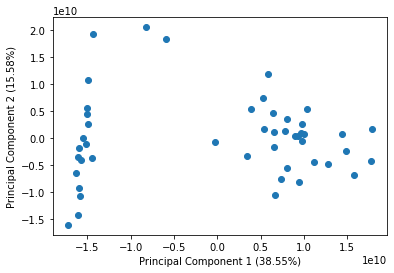

In [ ]:
plt.figure()
plt.scatter(comps[:, 0], comps[:, 1])
plt.xlabel(f"Principal Component 1 ({exp_var[0]:.2f}%)")
plt.ylabel(f"Principal Component 2 ({exp_var[1]:.2f}%)")
plt.show()

From here we could explore what gives rise to these two cluster by coloring the points according to a variety of factors, such as batch or biological condition.